In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns
from datetime import datetime
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [7]:
# Load the dataset
df = pd.read_csv('../data/raw_analyst_ratings (1).csv')

In [14]:
print(df)

         Unnamed: 0                                           headline  \
0                 0            Stocks That Hit 52-Week Highs On Friday   
1                 1         Stocks That Hit 52-Week Highs On Wednesday   
2                 2                      71 Biggest Movers From Friday   
3                 3       46 Stocks Moving In Friday's Mid-Day Session   
4                 4  B of A Securities Maintains Neutral on Agilent...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher  \
0        https://www.benzinga.

In [15]:
df.head

<bound method NDFrame.head of          Unnamed: 0                                           headline  \
0                 0            Stocks That Hit 52-Week Highs On Friday   
1                 1         Stocks That Hit 52-Week Highs On Wednesday   
2                 2                      71 Biggest Movers From Friday   
3                 3       46 Stocks Moving In Friday's Mid-Day Session   
4                 4  B of A Securities Maintains Neutral on Agilent...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher  \


In [8]:
# Calculate the length of each headline and obtain basic statistics
df['headline_length'] = df['headline'].apply(len)
headline_stats = df['headline_length'].describe()
print("Headline Length Statistics:")
print(headline_stats)

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [9]:
# Use pandas' groupby() function to count the number of articles per publisher
articles_per_publisher = df.groupby('publisher').size().reset_index(name='article_count')
most_active_publishers = articles_per_publisher.sort_values(by='article_count', ascending=False).head(5)
print("\nMost Active Publishers:")
print(most_active_publishers)


Most Active Publishers:
             publisher  article_count
686      Paul Quintaro         228373
532         Lisa Levin         186979
96   Benzinga Newsdesk         150484
169      Charles Gross          96732
622      Monica Gerson          82380


In [11]:
# Analyze publication dates to identify trends over time
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d", errors='coerce')
df['year'] = df['date'].dt.year

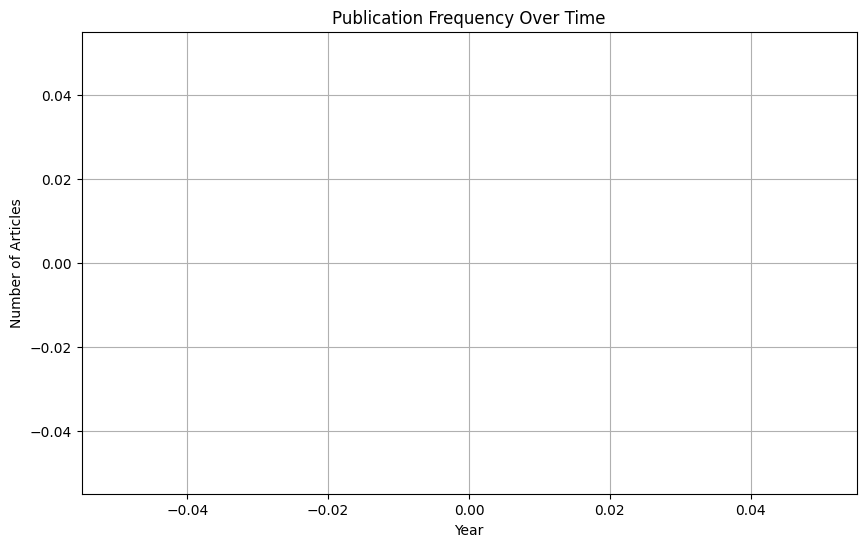

In [13]:
# Plotting publication frequency over time
plt.figure(figsize=(10, 6))
df.groupby('year').size().plot(kind='line', marker='o')
plt.title('Publication Frequency Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

In [4]:
# Ensure you have the necessary NLP libraries and datasets
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/ted/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/ted/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True